# IPL Winning Team Predictor

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 0.24.1
Uninstalling scikit-learn-0.24.1:
  Successfully uninstalled scikit-learn-0.24.1


In [5]:
!pip install -U scikit-learn==0.24.1


  Using cached scikit_learn-0.24.1-cp38-cp38-win_amd64.whl (6.9 MB)


## Reading the csv files 

### Matches from 2008 to 2021

In [2]:
matches_till_2021 = pd.read_csv("Dataset/IPL_Matches_2008_2021.csv")
matches_till_2021.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


### Matches played in 2022

In [3]:
matches_2022 = pd.read_csv("Dataset/IPL_Matches_2022.csv")
matches_2022.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


### Combining the 2 datasets - (2008 to 2021) & 2022 matches played

In [4]:
frames = [matches_2022, matches_till_2021]
matches = pd.concat(frames)
matches.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


### Displaying the IPL Seasons

In [5]:
# First, I'm following a uniform standard for the seasons
# Extracting the year part from the dates

matches['Season'] = matches['Season'].replace('2007/08','2008')
matches['Season'] = matches['Season'].str.replace('2020/21','2020')
matches['Season'] = matches['Season'].str.replace('2009/10','2010')
matches['Season'] = matches['Season'].replace(np.nan, '2022')

matches.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [96]:
matches['Season'].unique()


array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008'],
      dtype=object)

### Ball by Ball data

In [7]:
delivery_till_2021 = pd.read_csv('Dataset/IPL_Ball_by_Ball_2008_2021.csv')
delivery_2022 = pd.read_csv("Dataset/IPL_Ball_by_Ball_2022.csv")

frames = [delivery_2022, delivery_till_2021]
delivery = pd.concat(frames)
delivery.head()


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [8]:
delivery.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 208041
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

## Adding the field 'BowlingTeam' in the delivery dataframe

In [9]:
#Creating a reduced data frame from matches, with the match ID and the participating teams
data = {
    'ID': matches['ID'],
    'Team1': matches['Team1'],
    'Team2': matches['Team2']
}

matches_subset = pd.DataFrame(data)


#Inner joining this reduced matches dataframe with deliveries dataframe on 'ID'
delivery['BowlingTeam'] = "" #Creating an empty attribute called BowlingTeam in deliveries
delivery = pd.merge(matches_subset, delivery, on='ID', how='inner')

#Filling the BowlingTeam attribute with the appropriate team names
for idx in delivery.index:
    delivery['BowlingTeam'][idx] = delivery['Team1'][idx] if delivery['BattingTeam'][idx] != delivery['Team1'][idx] else delivery['Team2'][idx]
        
delivery.drop(['Team1', 'Team2'], axis = 1)

delivery.head(10)

,ID,Team1,Team2,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,1312200,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
3,1312200,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
4,1312200,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
5,1312200,Rajasthan Royals,Gujarat Titans,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
6,1312200,Rajasthan Royals,Gujarat Titans,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
7,1312200,Rajasthan Royals,Gujarat Titans,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
8,1312200,Rajasthan Royals,Gujarat Titans,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
9,1312200,Rajasthan Royals,Gujarat Titans,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


## Since the above process took a lot of time to execute, we'll save the results of the data frame in a csv file

In [11]:
delivery.to_csv('Dataset/Processed_Data/Ball_By_Ball_Till_2022.csv')

## Import features for predicting the winning team
- Batting team
- Bowling team
- city
- Runs_left
- Balls_left
- wickets_left
- total_runs_x(Made by 1st inning team)
- current_run_rate(CRR)
- Required_run_rate(RRR)
- result(Batting team Win or not)

## Grouping these features

In [12]:
delivery.groupby(['ID','innings']).sum()['total_run']
##This will give the runs scored in innings 1 and 2 respectively in each match

ID       innings
335982   1          222
         2           82
335983   1          240
         2          207
335984   1          129
                   ... 
1312198  2          193
1312199  1          157
         2          161
1312200  1          130
         2          133
Name: total_run, Length: 1928, dtype: int64

In [13]:
# convert into dataframe by runnig reset_index()
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [14]:
total_score_df['total_run'] = total_score_df['total_run'] + 1 #Target

In [15]:
# Needed only 1st innings matches
total_score_df = total_score_df[total_score_df['innings'] == 1]

In [16]:
match_df = matches.merge(total_score_df[['ID','total_run']], left_on = 'ID',right_on = 'ID')
match_df.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [17]:
#Saving it as a CSV file so that this can be directly used in the future
match_df.to_csv('Dataset/Processed_Data/Matches_Till_2022.csv')

In [18]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

### NOTE:
- Deccan Chargers -> Sunrises Hyderabad 
- Delhi Daredevils -> Delhi Capitals 
- Kings X1 Punjab -> Punjab Kings 
- {'Rising Pune Supergiants', 'Pune Warriors'} -> 'Rising Pune Supergiant'
- Gujarat Lions -> Gujarat Titans

In [19]:
teams=['Sunrisers Hyderabad',
       'Mumbai Indians',
       'Royal Challengers Bangalore',
       'Kolkata Knight Riders',
       'Punjab Kings',
       'Chennai Super Kings',
       'Rajasthan Royals',
       'Delhi Capitals',
       'Lucknow Super Giants',
       'Gujarat Titans']
#Playing 10 teams

In [20]:
match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2']=match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1']=match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2']=match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1']=match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2']=match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['Team1']=match_df['Team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['Team2']=match_df['Team2'].str.replace('Gujarat Lions','Gujarat Titans')

match_df['Team1']=match_df['Team1'].str.replace('Pune Warriors','Rising Pune Supergiant')
match_df['Team2']=match_df['Team2'].str.replace('Pune Warriors','Rising Pune Supergiant')

match_df['Team1']=match_df['Team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
match_df['Team2']=match_df['Team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')






In [21]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala'], dtype=object)

## As per the playing 10 teams

In [22]:
match_df=match_df[match_df['Team1'].isin(teams)]
match_df=match_df[match_df['Team2'].isin(teams)]

In [23]:
match_df['Team1'].unique()
#Rising Pune Supergiant and Kochi Tuskers Kerala have been removed

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [24]:
match_df.shape


(861, 21)

## Condensing the dataframe match_df.....We need only the city, winner and the target for prediction

In [25]:
match_df=match_df[['ID','City','WinningTeam','total_run']]
match_df

,ID,City,WinningTeam,total_run
0,1312200,Ahmedabad,Gujarat Titans,131
1,1312199,Ahmedabad,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,208
3,1312197,Kolkata,Gujarat Titans,189
4,1304116,Mumbai,Punjab Kings,158
...,...,...,...,...
945,335985,Mumbai,Royal Challengers Bangalore,166
946,335986,Kolkata,Kolkata Knight Riders,111
947,335984,Delhi,Delhi Daredevils,130
948,335983,Chandigarh,Chennai Super Kings,241


In [26]:
# Merging the delivery and match_df dataframes
delivery_df=match_df.merge(delivery,on='ID')

#We're concerned with the second innings
delivery_df = delivery_df[delivery_df['innings'] == 2]
delivery_df.head(5)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals


## Finding out the total runs made after each ball using cummulative sum

In [27]:
delivery_df['current_score'] = delivery_df.groupby('ID').cumsum()['total_run_y']
delivery_df['current_score']

120        0
121        0
122        1
123        1
124        1
          ..
205076    80
205077    81
205078    81
205079    82
205080    82
Name: current_score, Length: 98901, dtype: int64

In [28]:
delivery_df.head(5)

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1


In [29]:
## Adding other necessary attributes
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

delivery_df['balls_left'] = 120 - (delivery_df['overs'] * 6 + delivery_df['ballnumber'])

delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out']=delivery_df['player_out'].astype('int')

wickets = delivery_df.groupby('ID').cumsum()['player_out'].values
delivery_df['wickets']= 10 - wickets

delivery_df.head(5)


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,119,10
121,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,131,118,10
122,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,117,10
123,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,116,10
124,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,130,115,10


## Current Run Rate (CRR)

In [30]:
#crr= runs_made_till now/overs(in fraction)
delivery_df['crr'] = (delivery_df['current_score'] * 6)/(120 - delivery_df['balls_left'])
delivery_df['crr']

120       0.000000
121       0.000000
122       2.000000
123       1.500000
124       1.200000
            ...   
205076    5.393258
205077    5.400000
205078    5.340659
205079    5.406593
205080    5.347826
Name: crr, Length: 98901, dtype: float64

## Required Run Rate (RRR)

In [31]:
# rrr = runs_left / overs
delivery_df['rrr'] = (delivery_df['runs_left'] * 6) / delivery_df['balls_left']
delivery_df['rrr']

120        6.605042
121        6.661017
122        6.666667
123        6.724138
124        6.782609
            ...    
205076    27.677419
205077    28.400000
205078    29.379310
205079    29.172414
205080    30.214286
Name: rrr, Length: 98901, dtype: float64

## Some stats

In [32]:
df = matches[(matches['WinningTeam'] == 'Chennai Super King') & (matches['Season'] == '2016') ].groupby(['Season'])['ID'].count()
df.empty
#Because in 2016 SRH won 

True

In [33]:
#Total matches played by Mumbai Indians Season Wise
matches[(matches['Team1'] == 'Mumbai Indians') | (matches['Team2'] == 'Mumbai Indians') ].groupby(['Season'])['ID'].count()


Season
2008    14
2009    13
2010    16
2011    16
2012    17
2013    19
2014    15
2015    16
2016    14
2017    17
2018    14
2019    16
2020    16
2021    14
2022    14
Name: ID, dtype: int64

## Match wins for each team in 2022 season

In [34]:
match_wins = matches[matches['Season']=='2022']['WinningTeam'].value_counts()
match_wins

#Note it's not a fully updated dataset....at this stage MI didn't win any match and hence is not in the list

Gujarat Titans                 12
Rajasthan Royals               10
Royal Challengers Bangalore     9
Lucknow Super Giants            9
Delhi Capitals                  7
Punjab Kings                    7
Kolkata Knight Riders           6
Sunrisers Hyderabad             6
Chennai Super Kings             4
Mumbai Indians                  4
Name: WinningTeam, dtype: int64

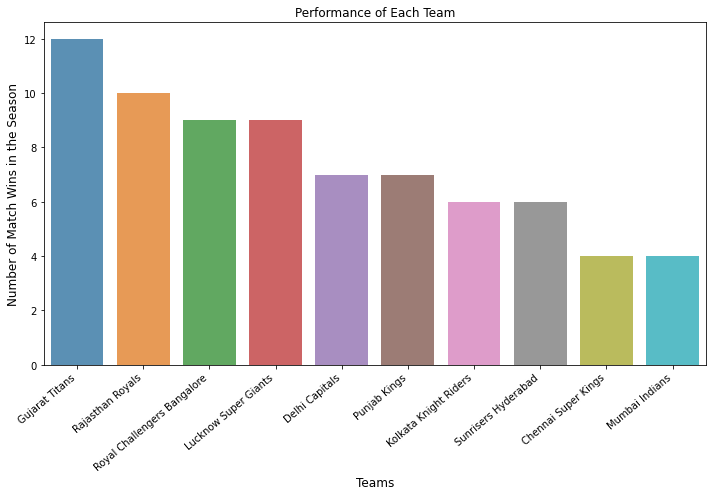

In [35]:
plt.figure(figsize=(10,7))
ax = sns.barplot(match_wins.index, match_wins.values, alpha = 0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

plt.title('Performance of Each Team')
plt.ylabel('Number of Match Wins in the Season', fontsize = 12)
plt.xlabel('Teams', fontsize = 12)
plt.tight_layout()
plt.show()

In [36]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

delivery_df['result'] = delivery_df.apply(result, axis = 1)
delivery_df['result']

120       1
121       1
122       1
123       1
124       1
         ..
205076    0
205077    0
205078    0
205079    0
205080    0
Name: result, Length: 98901, dtype: int64

## Final dataset after feature engineering, this will be used to train the ML model

In [37]:
# final_df = delivery_df[['Batting_Team','Bowling_team','City','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
# final_df

data = {
    'Batting_Team': delivery_df['BattingTeam'],
    'Bowling_team': delivery_df['BowlingTeam'],
    'City': delivery_df['City'],
    'runs_left': delivery_df['runs_left'],
    'balls_left': delivery_df['balls_left'],
    'wickets': delivery_df['wickets'],
    'total_runs_x': delivery_df['total_run_x'],
    'crr': delivery_df['crr'],
    'rrr': delivery_df['rrr'],
    'result': delivery_df['result'] 
}

final_df = pd.DataFrame(data)
final_df

# final_df['result'] shows the batting team in the 2nd Innings is a winner or not.

,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,131,0.000000,6.605042,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,131,0.000000,6.661017,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,131,2.000000,6.666667,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,131,1.500000,6.724138,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,131,1.200000,6.782609,1
...,...,...,...,...,...,...,...,...,...,...
205076,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,143,31,1,223,5.393258,27.677419,0
205077,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,30,1,223,5.400000,28.400000,0
205078,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,142,29,1,223,5.340659,29.379310,0
205079,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,141,29,1,223,5.406593,29.172414,0


In [38]:
final_df = final_df.sample(final_df.shape[0])
final_df.isnull().sum()

Batting_Team       0
Bowling_team       0
City            6012
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
crr                0
rrr               11
result             0
dtype: int64

In [39]:
final_df.dropna(inplace = True)

final_df = final_df[final_df['balls_left']!=0]   # we don't want INF rrr
final_df

,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
70268,Mumbai Indians,Sunrisers Hyderabad,Mumbai,45,39,5,119,5.481481,6.923077,0
3165,Gujarat Titans,Chennai Super Kings,Mumbai,9,14,7,134,7.075472,3.857143,1
13488,Lucknow Super Giants,Rajasthan Royals,Mumbai,117,69,7,166,5.764706,10.173913,0
100346,Mumbai Indians,Chennai Super Kings,Chennai,96,79,10,159,9.219512,7.291139,1
116555,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,18,10,5,191,9.436364,10.800000,1
...,...,...,...,...,...,...,...,...,...,...
109968,Kolkata Knight Riders,Mumbai Indians,Kolkata,168,119,10,169,6.000000,8.470588,1
134475,Delhi Daredevils,Chennai Super Kings,Delhi,125,70,6,170,5.400000,10.714286,0
6140,Chennai Super Kings,Royal Challengers Bangalore,Pune,173,117,10,174,2.000000,8.871795,0
59751,Royal Challengers Bangalore,Mumbai Indians,Bengaluru,11,5,5,188,9.234783,13.200000,0


In [40]:
final_df.to_csv('Dataset/Processed_Data/Final_Dataset_After_Feature_Engineering.csv')

## Splitting into training and test data

In [41]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_train

,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr
62121,Chennai Super Kings,Sunrisers Hyderabad,Mumbai,99,70,6,140,4.920000,8.485714
56477,Delhi Capitals,Royal Challengers Bangalore,Bengaluru,97,87,9,150,9.636364,6.689655
155522,Delhi Daredevils,Chennai Super Kings,Chennai,153,106,10,177,10.285714,8.660377
20002,Royal Challengers Bangalore,Sunrisers Hyderabad,Abu Dhabi,105,83,8,142,6.000000,7.590361
48278,Kings XI Punjab,Chennai Super Kings,Chandigarh,69,63,10,171,10.736842,6.571429
...,...,...,...,...,...,...,...,...,...
76260,Kolkata Knight Riders,Mumbai Indians,Kolkata,133,93,8,174,9.111111,8.580645
167708,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,98,69,9,161,7.411765,8.521739
153203,Mumbai Indians,Kolkata Knight Riders,Mumbai,134,114,10,148,14.000000,7.052632
200284,Deccan Chargers,Royal Challengers Bangalore,Bangalore,60,42,8,157,7.461538,8.571429


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['Batting_Team','Bowling_team','City'])
]
,remainder='passthrough')

## Training the Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression

In [57]:
LogReg=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [58]:
LogReg.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Batting_Team',
                                                   'Bowling_team', 'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

## Random Forest

In [59]:
Rf=Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [60]:
Rf.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Batting_Team',
                                                   'Bowling_team', 'City'])])),
                ('step2', RandomForestClassifier())])

## Support vector classification

In [61]:
dt_clf=Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier(max_depth=10, random_state = 42))
])

In [62]:
dt_clf.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Batting_Team',
                                                   'Bowling_team', 'City'])])),
                ('step2',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [63]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,74064.000000,74064.000000,74064.000000,74064.000000,74064.000000,74064.000000
mean,93.178332,63.144402,7.563702,166.076893,7.473096,10.433418
std,49.702389,33.206185,2.133246,28.845764,2.274053,13.897908
min,-15.000000,-2.000000,0.000000,63.000000,0.000000,-516.000000
25%,54.000000,35.000000,6.000000,148.000000,6.295082,7.200000
50%,92.000000,64.000000,8.000000,166.000000,7.500000,8.892857
75%,131.000000,92.000000,9.000000,186.000000,8.718750,10.902439
max,249.000000,119.000000,10.000000,249.000000,36.000000,714.000000


In [64]:
y_test.value_counts()      # Ratio is almost 1:1

1    9937
0    8580
Name: result, dtype: int64

## Accuracy of Each Model

In [65]:
y_pred=LogReg.predict(X_test)

In [66]:
# Logistic Regression
accuracy_score(y_test,y_pred)

0.8178970675595398

In [67]:
y_pred=Rf.predict(X_test)

In [68]:
# random forest
accuracy_score(y_test,y_pred)

0.9985418804341956

In [69]:
y_pred=dt_clf.predict(X_test)

In [70]:
# SVC
accuracy_score(y_test,y_pred)

0.8607765836798618